In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
from math import pi
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import DistanceMetric
from sklearn.cluster import KMeans,DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples
from scipy.stats import kruskal
from scipy.stats import chisquare
from statsmodels.stats.multicomp import MultiComparison
%matplotlib inline
cf.go_offline()
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',200)

In [2]:
def make_spider(df, row, title, color, categories):
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax = plt.subplot(2,2,row+1, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.set_rlabel_position(0)
    plt.yticks([x/10 for x in range(0, 10, 2)], [str(x/10) for x in range(0, 10, 2)], color="grey", size=7)
    plt.ylim(0,1)
    values=df.loc[row].drop('gauss_cl').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    plt.title(title, size=11, color=color, y=1.1)

In [3]:
df=pd.read_pickle("Tabla_Proyecto_Limpia_forma1.pkl")

In [4]:
df=df[df["Source"]=="MapQuest"].copy()
#df=df.sample(frac=.05,random_state=1).copy()
df=df.reset_index(drop=True)

In [5]:
df.shape

(2028102, 54)

In [6]:
df.head(1)

,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Crossing,Junction,Station,Stop,Traffic_Signal,TimeMinutes,Hour,Weekday,Year,Month,Day,County_Freq,State_Freq,City_Freq,Airport_Freq,Weather,Temperature(F)_Escalado,Humidity(%)_Escalado,Pressure(in)_Escalado,Visibility(mi)_Escalado,Wind_Speed(mph)_Escalado,Temperature(F)_Escalado_KNN,Humidity(%)_Escalado_KNN,Pressure(in)_Escalado_KNN,Visibility(mi)_Escalado_KNN,Wind_Speed(mph)_Escalado_KNN,Side_moda,Wind_Direction_moda,Weather_moda
0,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,36.0,100.0,29.67,10.0,SW,3.5,Overcast,False,False,False,False,False,True,30,6,Mon,2016,Feb,8,507,66139,830.0,719.0,Overcast,-1.422476,1.580182,-0.047126,0.409644,-0.987424,-1.422476,1.580182,-0.047126,0.409644,-0.987424,R,SW,Overcast


In [7]:
df.columns

Index(['Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Crossing', 'Junction', 'Station', 'Stop', 'Traffic_Signal',
       'TimeMinutes', 'Hour', 'Weekday', 'Year', 'Month', 'Day', 'County_Freq',
       'State_Freq', 'City_Freq', 'Airport_Freq', 'Weather',
       'Temperature(F)_Escalado', 'Humidity(%)_Escalado',
       'Pressure(in)_Escalado', 'Visibility(mi)_Escalado',
       'Wind_Speed(mph)_Escalado', 'Temperature(F)_Escalado_KNN',
       'Humidity(%)_Escalado_KNN', 'Pressure(in)_Escalado_KNN',
       'Visibility(mi)_Escalado_KNN', 'Wind_Speed(mph)_Escalado_KNN',
       'Side_moda', 'Wind_Direction_moda', 'Weather_moda'],
      dtype='object')

In [8]:
cat=["Weather_moda","Wind_Direction_moda","Side_moda","Traffic_Signal","Stop","Station",
    'Amenity','Crossing', 'Junction','County', 'State','Severity']
cont=["Start_Lat","Start_Lng","Temperature(F)_Escalado_KNN"
      ,"Humidity(%)_Escalado_KNN","Pressure(in)_Escalado_KNN","Visibility(mi)_Escalado_KNN"
     ,"Wind_Speed(mph)_Escalado_KNN"]
otras=["TimeMinutes","Distance(mi)"]

In [9]:
X=df[cont]

In [10]:
X

,Start_Lat,Start_Lng,Temperature(F)_Escalado_KNN,Humidity(%)_Escalado_KNN,Pressure(in)_Escalado_KNN,Visibility(mi)_Escalado_KNN,Wind_Speed(mph)_Escalado_KNN
0,39.063148,-84.032608,-1.422476,1.580182,-0.047126,0.409644,-0.987424
1,39.747753,-84.205582,-1.470736,1.402971,-0.082267,-0.032505,-0.743019
2,39.627781,-84.188354,-1.422476,1.092852,-0.070553,-1.358952,-0.987424
3,40.100590,-82.925194,-1.320593,1.447274,-0.093981,-0.916803,-0.987424
4,39.758274,-84.230507,-1.529721,1.580182,-0.058840,-0.916803,-0.987424
...,...,...,...,...,...,...,...
2028097,34.495808,-118.623932,2.009370,-2.052637,-1.007644,0.409644,-0.654145
2028098,34.031322,-118.433723,0.776051,-0.014714,-0.023699,0.409644,-0.476397
2028099,34.106785,-117.369102,2.127340,-2.141243,0.023156,-1.358952,-0.476397
2028100,33.924686,-118.103981,1.365899,-1.122281,-0.035413,0.409644,-0.987424


# Cluster kmeans

In [ ]:
###numero de clusters
sse,db,slc = {}, {}, {}
for k in range(2, 15):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=10, n_jobs=-1).fit(X)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(X,clusters)
    slc[k] = silhouette_score(X,clusters)

In [ ]:
# Codo el menos ángulo
plt.figure(figsize=(15,10))
plt.plot(list(sse.keys()), list(sse.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
# Davies-Bouldin bajo
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()
# Silhoutte alto
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

# Tomaremos 4 clusters para k-means (optimos son 3)

In [16]:
cluster1 = KMeans(n_clusters=4, n_jobs=-1, random_state=10)

In [17]:
X["kmeans_cl"] = df["kmeans_cl"]= [str(x) for x in cluster1.fit_predict(X)]

/Users/flavs/opt/anaconda3/envs/flavsdiplo/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



In [18]:
X["kmeans_cl"].value_counts(1)

1    0.282334
2    0.257483
3    0.230981
0    0.229202
Name: kmeans_cl, dtype: float64

In [19]:
X.groupby("kmeans_cl").mean().style.background_gradient(cmap='Blues')

,Start_Lat,Start_Lng,Temperature(F)_Escalado_KNN,Humidity(%)_Escalado_KNN,Pressure(in)_Escalado_KNN,Visibility(mi)_Escalado_KNN,Wind_Speed(mph)_Escalado_KNN
kmeans_cl,,,,,,,
0,36.913593,-118.854973,0.144903,-0.294691,-0.026696,0.089613,-0.137340
1,40.488057,-78.935137,-0.427914,0.205805,0.202330,-0.125202,0.111178
2,32.294674,-82.547747,0.313724,0.194984,0.182571,0.050325,-0.108297
3,34.102351,-96.080012,0.108927,0.037185,-0.056084,0.003655,0.175145


# Gaussian Mixtures

In [ ]:
sse,db,slc = {}, {}, {}
for k in range(2, 15):
    cluster = GaussianMixture(n_components=k, random_state=10).fit(X)
    clusters = cluster.predict(X)
    db[k] = davies_bouldin_score(X,clusters)
    slc[k] = silhouette_score(X,clusters)

In [ ]:
#### davies-bouldin
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()
### silhoutte
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

In [20]:
gm=GaussianMixture(n_components=4)

In [21]:
df["gauss_cl"]=X["gauss_cl"] = [str(x) for x in gm.fit_predict(X)]

In [23]:
X["gauss_cl"].value_counts(1)

0    0.282334
2    0.257483
3    0.230981
1    0.229202
Name: gauss_cl, dtype: float64

In [24]:
X.groupby("gauss_cl").mean().style.background_gradient(cmap='Blues')

,Start_Lat,Start_Lng,Temperature(F)_Escalado_KNN,Humidity(%)_Escalado_KNN,Pressure(in)_Escalado_KNN,Visibility(mi)_Escalado_KNN,Wind_Speed(mph)_Escalado_KNN
gauss_cl,,,,,,,
0,40.488057,-78.935137,-0.427914,0.205805,0.202330,-0.125202,0.111178
1,36.913593,-118.854973,0.144903,-0.294691,-0.026696,0.089613,-0.137340
2,32.294674,-82.547747,0.313724,0.194984,0.182571,0.050325,-0.108297
3,34.102351,-96.080012,0.108927,0.037185,-0.056084,0.003655,0.175145


## Plots

In [25]:
aux = X.groupby("gauss_cl").mean().reset_index()

In [26]:
aux

,gauss_cl,Start_Lat,Start_Lng,Temperature(F)_Escalado_KNN,Humidity(%)_Escalado_KNN,Pressure(in)_Escalado_KNN,Visibility(mi)_Escalado_KNN,Wind_Speed(mph)_Escalado_KNN
0,0,40.488057,-78.935137,-0.427914,0.205805,0.202330,-0.125202,0.111178
1,1,36.913593,-118.854973,0.144903,-0.294691,-0.026696,0.089613,-0.137340
2,2,32.294674,-82.547747,0.313724,0.194984,0.182571,0.050325,-0.108297
3,3,34.102351,-96.080012,0.108927,0.037185,-0.056084,0.003655,0.175145


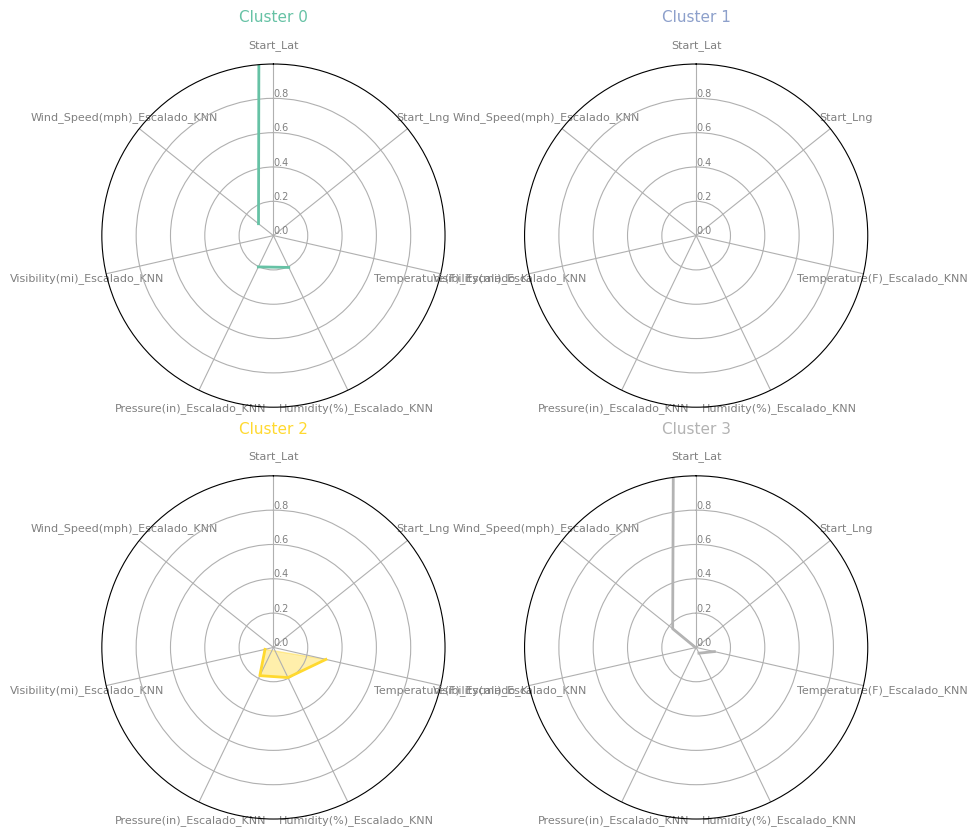

In [27]:
my_dpi=100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
my_palette = plt.cm.get_cmap("Set2", len(X["gauss_cl"].unique()))
 
for row in range(0, len(aux.index)):
    make_spider(df=aux, row=row, title='Cluster '+aux['gauss_cl'][row], color=my_palette(row), categories=aux.columns.tolist()[1:])

# krustal

In [28]:
cluster_features=['Start_Lat', 'Start_Lng', 
       'Temperature(F)_Escalado_KNN', 'Humidity(%)_Escalado_KNN',
       'Pressure(in)_Escalado_KNN', 'Visibility(mi)_Escalado_KNN',
       'Wind_Speed(mph)_Escalado_KNN']

In [29]:
cluster_features

['Start_Lat',
 'Start_Lng',
 'Temperature(F)_Escalado_KNN',
 'Humidity(%)_Escalado_KNN',
 'Pressure(in)_Escalado_KNN',
 'Visibility(mi)_Escalado_KNN',
 'Wind_Speed(mph)_Escalado_KNN']

In [30]:
ls_res = []
for feature in cluster_features:
    l = []
    for cl in X["gauss_cl"].unique():
        l.append(X.loc[X["gauss_cl"]==cl, feature].to_list())
    kr = kruskal(*l)
    ls_res.append((feature,kr.pvalue))

In [31]:
df_sig = pd.DataFrame(ls_res,columns=['variable','p-value'])
df_sig['p-value'] = df_sig['p-value'].map(lambda x:round(x,6))

In [32]:
df_sig

,variable,p-value
0,Start_Lat,0.0
1,Start_Lng,0.0
2,Temperature(F)_Escalado_KNN,0.0
3,Humidity(%)_Escalado_KNN,0.0
4,Pressure(in)_Escalado_KNN,0.0
5,Visibility(mi)_Escalado_KNN,0.0
6,Wind_Speed(mph)_Escalado_KNN,0.0


#### Análisis de categorías ($\chi^{2}$ & Tukey)

In [33]:
for v in df_sig['variable']:
    print(v)
    mc = MultiComparison(X[v],X['gauss_cl'])
    print(mc.tukeyhsd().summary())
    print('\n')

Start_Lat
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -3.5745 0.001 -3.5935 -3.5554   True
     0      2  -8.1934 0.001 -8.2118 -8.1749   True
     0      3  -6.3857 0.001 -6.4047 -6.3667   True
     1      2  -4.6189 0.001 -4.6384 -4.5995   True
     1      3  -2.8112 0.001 -2.8312 -2.7913   True
     2      3   1.8077 0.001  1.7883  1.8271   True
---------------------------------------------------


Start_Lng
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     0      1 -39.9198 0.001 -39.9391 -39.9006   True
     0      2  -3.6126 0.001  -3.6313   -3.594   True
     0      3 -17.1449 0.001 -17.1641 -17.1257   True
     1      2  36.3072 0.001  36.2876  36.3269   True
     1      3   22.775 0.001  22.7548  22.7951   True
     2      3 -13.5323 0.0

In [36]:
import pydotplus
from sklearn.tree import _tree, export_graphviz
from IPython.display import Image 
from io import StringIO
from sklearn.tree import DecisionTreeClassifier

In [37]:
tree = DecisionTreeClassifier()

In [38]:
tree.fit(X[cluster_features], y = X["gauss_cl"])

DecisionTreeClassifier()

In [39]:
tree.score(X[cluster_features], y = X["gauss_cl"])

1.0

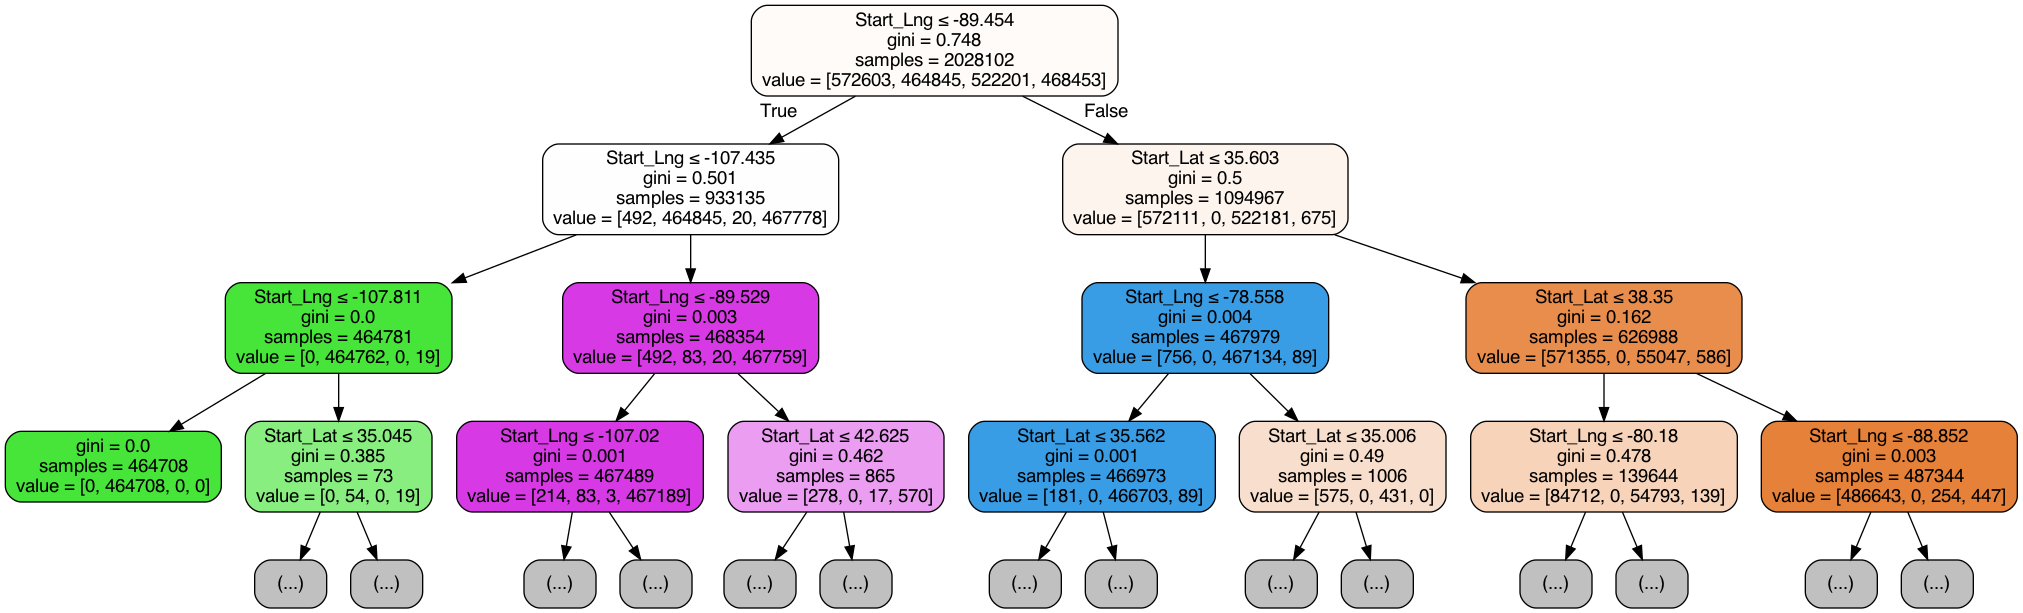

In [43]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=cluster_features,max_depth=3,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [45]:
tree.feature_importances_

array([3.18006279e-01, 6.80705315e-01, 8.98865694e-04, 5.53023109e-05,
       5.86960067e-05, 1.00851224e-04, 1.74690870e-04])

In [47]:
#df.to_csv("Proyecto_con_clusters.csv")

In [48]:
extra=pd.DataFrame(zip(cluster_features,tree.feature_importances_),columns=["Variable","Importancia"])

In [49]:
extra.sort_values(by=["Importancia"], ascending=False).reset_index(drop=True)

,Variable,Importancia
0,Start_Lng,0.680705
1,Start_Lat,0.318006
2,Temperature(F)_Escalado_KNN,0.000899
3,Wind_Speed(mph)_Escalado_KNN,0.000175
4,Visibility(mi)_Escalado_KNN,0.000101
5,Pressure(in)_Escalado_KNN,0.000059
6,Humidity(%)_Escalado_KNN,0.000055


In [50]:
extra.sort_values(by=["Importancia"]).iplot(kind='barh', y='Importancia', x="Variable",theme='white', color='blue', title="Decision Tree Regressor")

In [52]:
df.head(1)

,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Crossing,Junction,Station,Stop,Traffic_Signal,TimeMinutes,Hour,Weekday,Year,Month,Day,County_Freq,State_Freq,City_Freq,Airport_Freq,Weather,Temperature(F)_Escalado,Humidity(%)_Escalado,Pressure(in)_Escalado,Visibility(mi)_Escalado,Wind_Speed(mph)_Escalado,Temperature(F)_Escalado_KNN,Humidity(%)_Escalado_KNN,Pressure(in)_Escalado_KNN,Visibility(mi)_Escalado_KNN,Wind_Speed(mph)_Escalado_KNN,Side_moda,Wind_Direction_moda,Weather_moda,kmeans_cl,gauss_cl
0,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,36.0,100.0,29.67,10.0,SW,3.5,Overcast,False,False,False,False,False,True,30,6,Mon,2016,Feb,8,507,66139,830.0,719.0,Overcast,-1.422476,1.580182,-0.047126,0.409644,-0.987424,-1.422476,1.580182,-0.047126,0.409644,-0.987424,R,SW,Overcast,1,0


In [59]:
cat2=['Severity','Side_moda','State','Wind_Direction_moda', 'Weather_moda','Timezone'
       ,'Hour', 'Weekday', 'Month']#,'Amenity','Crossing', 'Junction', 'Station', 'Stop', 'Traffic_Signal',

In [71]:
for col in cat2:
      display(pd.crosstab(df['gauss_cl'],df[col],margins = False,normalize=1).style.background_gradient(cmap='Blues'))

Severity,1,2,3,4
gauss_cl,,,,
0,0.267816,0.276752,0.293307,0.304831
1,0.280460,0.208425,0.271770,0.110789
2,0.224138,0.265250,0.240961,0.369726
3,0.227586,0.249573,0.193962,0.214654


Side_moda,L,R
gauss_cl,,
0,0.294375,0.279231
1,0.161508,0.246650
2,0.283752,0.250712
3,0.260365,0.223407


State,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
gauss_cl,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.942948,0.962127,0.000000,0.341586,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.445549,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.992200,1.000000,0.000000,0.938643,1.000000,0.000000
1,0.000000,0.000000,1.000000,1.000000,0.007700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.886364,0.000000,0.000000,0.000000,0.000000,0.000000,0.035572,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.419118
2,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.001854,0.037873,0.000000,0.658350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.453094,0.000000,0.554451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.860960,0.000000,0.000000,0.007800,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.992300,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.055198,0.000000,1.000000,0.000064,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.546906,0.113636,0.000000,1.000000,1.000000,0.000000,0.000000,0.964428,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.139040,1.000000,0.000000,0.000000,0.000000,0.000000,0.061357,0.000000,0.580882


Wind_Direction_moda,E,N,NE,NW,S,SE,SW,Variable,W,calm
gauss_cl,,,,,,,,,,
0,0.256679,0.258491,0.304761,0.335845,0.251319,0.200684,0.327934,0.216235,0.350767,0.233995
1,0.170173,0.136573,0.100894,0.260220,0.200751,0.217661,0.278614,0.308272,0.344695,0.266856
2,0.341940,0.274391,0.357167,0.211108,0.215334,0.231674,0.248939,0.220730,0.198064,0.346520
3,0.231207,0.330544,0.237178,0.192828,0.332595,0.349980,0.144512,0.254764,0.106474,0.152629


Weather_moda,Clear,Cloudy,Fair,Fog,Haze,Other,Overcast,ThunderStorm,rainy,snow
gauss_cl,,,,,,,,,,
0,0.221225,0.288490,0.226567,0.324493,0.154429,0.290108,0.365381,0.178230,0.349697,0.676007
1,0.351955,0.188788,0.224012,0.148906,0.585608,0.354676,0.182614,0.026760,0.170291,0.061506
2,0.210454,0.281102,0.320342,0.285775,0.092593,0.160072,0.198699,0.456424,0.294871,0.030872
3,0.216367,0.241619,0.229079,0.240827,0.167371,0.195144,0.253306,0.338586,0.185141,0.231615


Timezone,US/Central,US/Eastern,US/Mountain,US/Pacific
gauss_cl,,,,
0,0.109037,0.535496,0.000000,0.000000
1,0.000000,0.000000,0.641380,0.996533
2,0.138970,0.464504,0.000000,0.000000
3,0.751994,0.000000,0.358620,0.003467


Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
gauss_cl,,,,,,,,,,,,,,,,,,,,,,,,
0,0.182289,0.184414,0.208987,0.251307,0.297941,0.305374,0.320876,0.348679,0.354993,0.275815,0.276758,0.271331,0.241949,0.248801,0.261624,0.239434,0.279460,0.278559,0.256587,0.243775,0.227152,0.226789,0.233861,0.179564
1,0.778026,0.728276,0.711066,0.642031,0.249261,0.266413,0.175950,0.141077,0.137175,0.205252,0.211370,0.237958,0.244058,0.260757,0.282246,0.251437,0.217559,0.217820,0.243189,0.263301,0.313494,0.310609,0.308762,0.656848
2,0.013189,0.016138,0.017572,0.040050,0.258026,0.228168,0.270348,0.275540,0.267386,0.249016,0.263095,0.269971,0.278286,0.264745,0.255560,0.265523,0.269347,0.263180,0.257840,0.266810,0.240593,0.212305,0.217680,0.055916
3,0.026496,0.071172,0.062374,0.066612,0.194772,0.200045,0.232826,0.234704,0.240445,0.269917,0.248777,0.220740,0.235707,0.225696,0.200569,0.243607,0.233634,0.240441,0.242384,0.226114,0.218761,0.250297,0.239696,0.107672


Weekday,Fri,Mon,Sat,Sun,Thu,Tue,Wed
gauss_cl,,,,,,,
0,0.283817,0.286404,0.234037,0.242504,0.285055,0.292435,0.289167
1,0.211828,0.211211,0.361858,0.371786,0.222646,0.208912,0.213367
2,0.267822,0.266433,0.216676,0.206617,0.258251,0.261911,0.258907
3,0.236532,0.235951,0.187429,0.179093,0.234048,0.236743,0.238559


Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
gauss_cl,,,,,,,,,,,,
0,0.246019,0.266954,0.313128,0.291998,0.307789,0.282950,0.270784,0.267694,0.248138,0.295031,0.303309,0.290697
1,0.272641,0.244767,0.171872,0.202315,0.189033,0.265984,0.271519,0.230313,0.267034,0.210035,0.202331,0.231749
2,0.258619,0.253172,0.271772,0.259385,0.264499,0.229898,0.248826,0.275306,0.266268,0.258278,0.262509,0.238573
3,0.222721,0.235107,0.243228,0.246301,0.238678,0.221169,0.208872,0.226688,0.218561,0.236656,0.231851,0.238981


In [ ]:
df['Amenity']=df['Amenity']*1
df['Crossing']=df['Crossing']*1
df['Junction']=df['Junction']*1
df['Station']=df['Station']*1
df['Stop']=df['Stop']*1
df['Traffic_Signal']=df['Traffic_Signal']*1

In [72]:
df[['gauss_cl','Amenity','Crossing', 'Junction', 'Station', 'Stop', 'Traffic_Signal']].groupby("gauss_cl").agg(lambda x: x.sum()/x.shape[0]).style.background_gradient(cmap='Blues')

,Amenity,Crossing,Junction,Station,Stop,Traffic_Signal
gauss_cl,,,,,,
0,0.017342,0.087569,0.051819,0.026008,0.012990,0.201897
1,0.017660,0.094369,0.082051,0.028721,0.026204,0.141385
2,0.006561,0.078602,0.025438,0.015216,0.005661,0.223803
3,0.014949,0.107842,0.030315,0.016138,0.025943,0.261653


In [ ]:
# Cluster 0 gente que va a trabajar(Accidentes al trabajo)
# Cluster 1 gente que va regresando de la peda(Accidentes a eventos sociales)
# Cluster 2 Accidentes vías congestionadas(Accidentes graves)
# Cluster 3 Accidentes Generales(Accidentes menores)

In [97]:
d = {'clima': ["ThunderStorm", "Fair","Rainy"], 'Tasa': [.75, .5,.25]}
d2 = pd.DataFrame(data=d)

In [98]:
d2

,clima,Tasa
0,ThunderStorm,0.75
1,Fair,0.50
2,Rainy,0.25


In [99]:
d2.iplot?

In [100]:
d2.sort_values(by='Tasa',ascending=True).iplot(kind='barh', y='Tasa', x="clima", color='#978350')

In [104]:
X_aux=df[cluster_features+["gauss_cl"]].sample?

Object `sample` not found.


In [105]:
X_aux=df[cluster_features+["gauss_cl"]].sample(frac=.01)

In [106]:
X_aux.shape

(20281, 8)

In [109]:
pca = PCA(n_components=2)
#mds = MDS(n_components=2,n_jobs=-1)
#tsne = TSNE(n_components=2, perplexity=100)

In [110]:
Xp  = pd.DataFrame(pca.fit_transform(X_aux[cluster_features]),columns=['d1','d2'])
#Xm  = pd.DataFrame(mds.fit_transform(X_aux[cluster_features]),columns=['d1','d2'])
#Xt  = pd.DataFrame(tsne.fit_transform(X_aux[cluster_features]),columns=['d1','d2'])

In [120]:
#Xt["gauss_cl"] = Xm["gauss_cl"] = X_aux["gauss_cl"] 
Xp["gauss_cl"] = X_aux["gauss_cl"].reset_index(drop=True) 

In [121]:
Xp.reset_index().iplot(kind = "scatter", mode="markers",categories="gauss_cl",  x="d1", y="d2")

/Users/flavs/opt/anaconda3/envs/flavsdiplo/lib/python3.7/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/Users/flavs/opt/anaconda3/envs/flavsdiplo/lib/python3.7/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [122]:
Xp

,d1,d2,gauss_cl
0,-15.788532,2.864026,0
1,24.259647,-1.945093,1
2,-11.066205,-2.596714,2
3,26.163071,-0.374457,1
4,29.941077,7.862383,1
...,...,...,...
20276,24.180002,-3.178089,1
20277,-12.073726,-1.854689,2
20278,-6.351625,-0.013655,2
20279,-2.619412,2.460277,3


In [ ]:
Xp.reset_index().iplot

In [ ]:
Xm.reset_index().iplot(kind = "scatter", mode="markers", text="song_title", x="d1", y="d2")